# Goals:
## 1. Loading Data:
- [x] 1.1 Load original and augmented ARC data on the server. Visualize some augmentations and save to a file. 
- [x] 1.2 Reformat the data into strings. 

## 2. Load Model and Generate Outputs
- [] 2.1 Load pre-trained Llama model.
- [] 2.2 Provide it one or two tasks and have it generate outputs. Print to slurm file.

In [19]:
import json
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

def load_json(filename):
    with open(filename, 'r') as file:
        data = json.load(file)
    return data

def display_data_raw(data):
    for key, value in list(data.items())[28:29]:
        print(f"Key: {key}")
        for sub_key, sub_value in value.items():
            print(f"  Sub-key: {sub_key}")
            if isinstance(sub_value, list):
                print(f"    List of {len(sub_value)} items")
                for i, item in enumerate(sub_value):
                    print(f"    Item {i+1}: {item}")
            else:
                print(f"{sub_value}")

def plot_grid(grid, ax, title=""):
    cmap = ['#252525', '#0074D9','#FF4136','#37D449', '#FFDC00','#E6E6E6', '#F012BE','#FF871E', '#54D2EB',  '#8D1D2C', '#FFFFFF']
    # cmap = ['#000000', '#808080']
    grid_array = np.array(grid)
    ax.imshow(grid_array, cmap=mcolors.ListedColormap(cmap), vmin=0, vmax=len(cmap)-1)
    ax.set_xticks(np.arange(-0.5, grid_array.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-0.5, grid_array.shape[0], 1), minor=True)
    ax.grid(which='minor', color='gray', linestyle='-', linewidth=2)
    ax.tick_params(which='minor', size=0)
    ax.set_title(title)
    ax.axis('off')

def plot_task(task, task_id):
    num_train_items = len(task['train'])
    num_test_items = len(task['test'])
    
    # Calculate the number of rows needed
    num_train_rows = (num_train_items + 1) // 2  # Two train pairs per row
    num_test_rows = num_test_items  # One test pair per row
    total_rows = num_train_rows + num_test_rows

    fig, axes = plt.subplots(total_rows, 4, figsize=(14, 3*total_rows))
    # Keep track of used axes
    used_axes = set()
    
    for idx, item in enumerate(task['train']):
        row = idx // 2
        col = (idx % 2) * 2
        plot_grid(item['input'], axes[row, col], title=f"Train Input {idx+1}")
        plot_grid(item['output'], axes[row, col + 1], title=f"Train Output {idx+1}")
        used_axes.update([(row, col), (row, col + 1)])

    for idx, item in enumerate(task['test']):
        row = num_train_rows + idx
        plot_grid(item['input'], axes[row, 0], title=f"Test Input {idx+1}")
        used_axes.add((row, 0))
        for col in range(1, 4):
            axes[row, col].axis('off')

    # Hide unused axes
    for row in range(total_rows):
        for col in range(4):
            if (row, col) not in used_axes:
                axes[row, col].axis('off')
    
    plt.suptitle(f"Task {task_id}")
    plt.tight_layout()
    plt.show()

def display_data(data):
    for task_id, task in list(data.items())[70:90]:
        plot_task(task, task_id)

# # Usage example
# filename = 'data/arc-agi_test_challenges.json'
# data = load_json(filename) # Load the data
# # display_data_raw(data)
# display_data(data)

In [2]:
import os
from competition_code import arc_loader as al

base_path = "."
arc_challenge_file = os.path.join("..", 'data', 'arc-agi_training_challenges.json')
arc_solution_file = os.path.join("..", 'data', 'arc-agi_training_solutions.json')

# arc_test_set = al.ArcDataset.from_file(arc_challenge_file)
# format = al.ArcFormatter_pretext3

In [12]:
from competition_code import arc_loader as al

# 1. Load dataset from a JSON file containing ARC tasks
dataset = al.ArcDataset.from_file(arc_challenge_file)

print(dataset.keys[:5])
print(dataset.queries[dataset.keys[0]])
# 2. Basic operations you can perform:

# Shuffle the dataset
shuffled_dataset = dataset.shuffled(seed=42)  # Optional seed for reproducibility
print(shuffled_dataset.keys[:5])

# Split dataset into train/test portions
train_dataset, test_dataset = dataset.split_at_pos(0.8, random_seed=42)  # Split 80/20
print(train_dataset.keys[:5], test_dataset.keys[:5])

# Sort examples by input size
sorted_dataset = dataset.sort_ex_by_input_size()
print(sorted_dataset.keys[:5])

# Get length of dataset
length = dataset.length()
print(length)

# If you have solutions, load them:
dataset = dataset.load_replies(arc_solution_file)
print(dataset.keys[:5])


*** Load challanges from '..\data\arc-agi_training_challenges.json'...
['007bbfb7', '00d62c1b', '017c7c7b', '025d127b', '045e512c']
{'test': [{'input': [[7, 0, 7], [7, 0, 7], [7, 7, 0]]}], 'train': [{'input': [[0, 7, 7], [7, 7, 7], [0, 7, 7]], 'output': [[0, 0, 0, 0, 7, 7, 0, 7, 7], [0, 0, 0, 7, 7, 7, 7, 7, 7], [0, 0, 0, 0, 7, 7, 0, 7, 7], [0, 7, 7, 0, 7, 7, 0, 7, 7], [7, 7, 7, 7, 7, 7, 7, 7, 7], [0, 7, 7, 0, 7, 7, 0, 7, 7], [0, 0, 0, 0, 7, 7, 0, 7, 7], [0, 0, 0, 7, 7, 7, 7, 7, 7], [0, 0, 0, 0, 7, 7, 0, 7, 7]]}, {'input': [[4, 0, 4], [0, 0, 0], [0, 4, 0]], 'output': [[4, 0, 4, 0, 0, 0, 4, 0, 4], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 4, 0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 4, 0, 4, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 4, 0, 0, 0, 0]]}, {'input': [[0, 0, 0], [0, 0, 2], [2, 0, 2]], 'output': [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0

In [75]:
# task input: dataset.queries
# taks_id: dataset.keys[15]
# dataset.queries[dataset.keys[15]]
dataset.queries[dataset.keys[15]]

{'test': [{'input': [[8, 1, 3], [8, 1, 3], [8, 1, 3]]}],
 'train': [{'input': [[3, 1, 2], [3, 1, 2], [3, 1, 2]],
   'output': [[4, 5, 6], [4, 5, 6], [4, 5, 6]]},
  {'input': [[2, 3, 8], [2, 3, 8], [2, 3, 8]],
   'output': [[6, 4, 9], [6, 4, 9], [6, 4, 9]]},
  {'input': [[5, 8, 6], [5, 8, 6], [5, 8, 6]],
   'output': [[1, 9, 2], [1, 9, 2], [1, 9, 2]]},
  {'input': [[9, 4, 2], [9, 4, 2], [9, 4, 2]],
   'output': [[8, 3, 6], [8, 3, 6], [8, 3, 6]]}]}

*** Load challanges from '..\data\arc-agi_training_challenges.json'...
Original dataset size: 400
*** Augment dataset...
Rotated dataset size: 1600


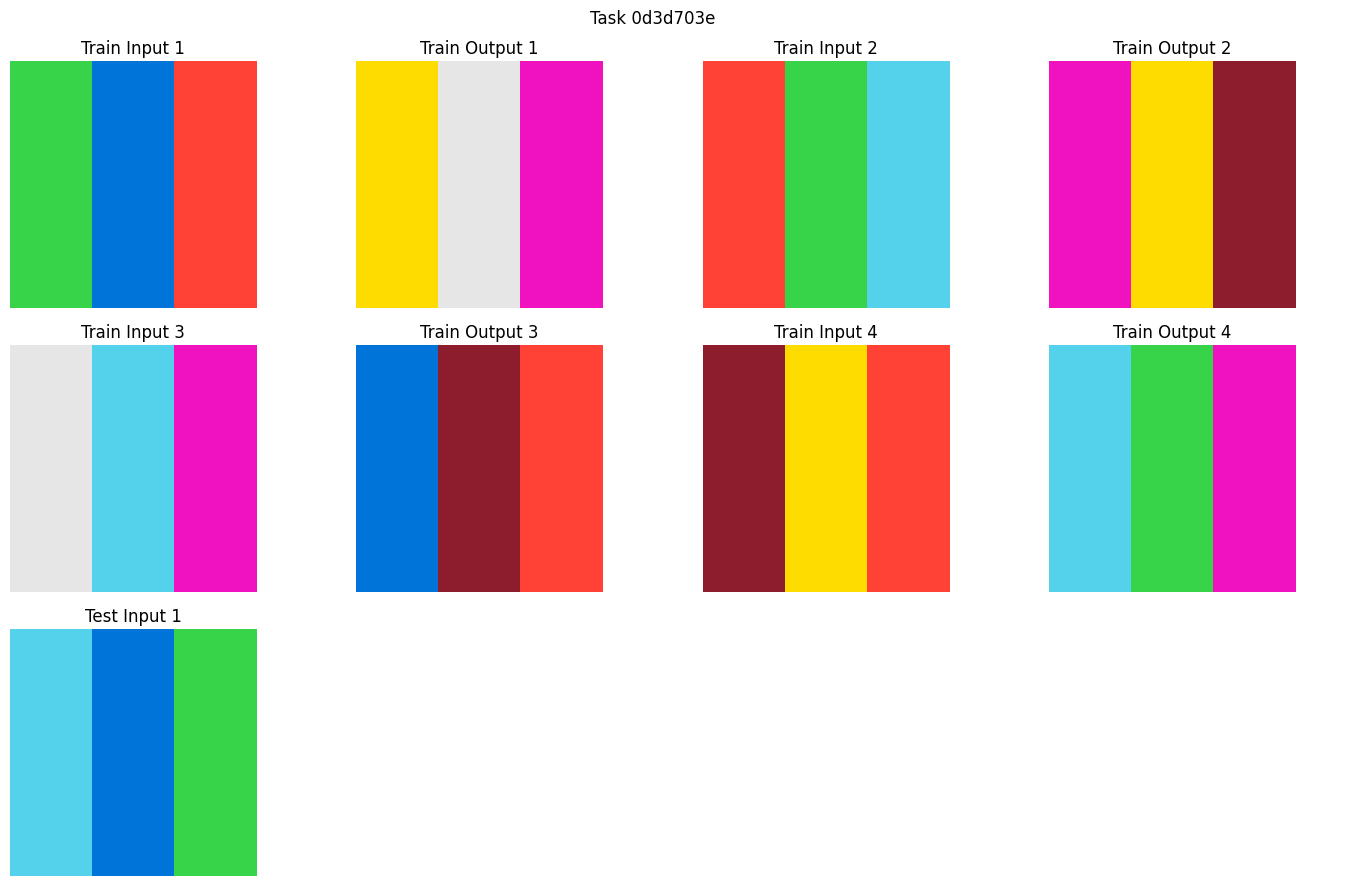

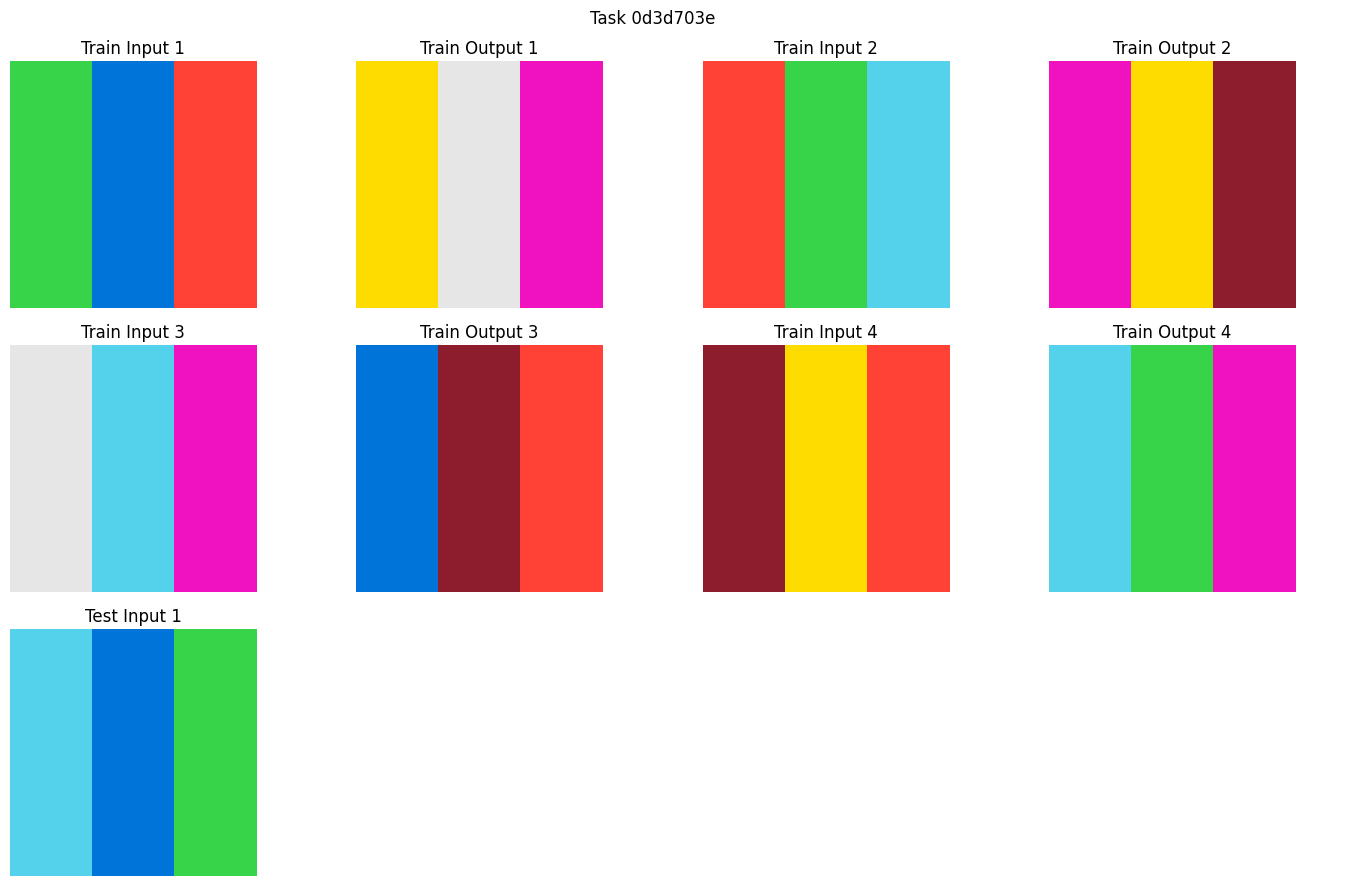

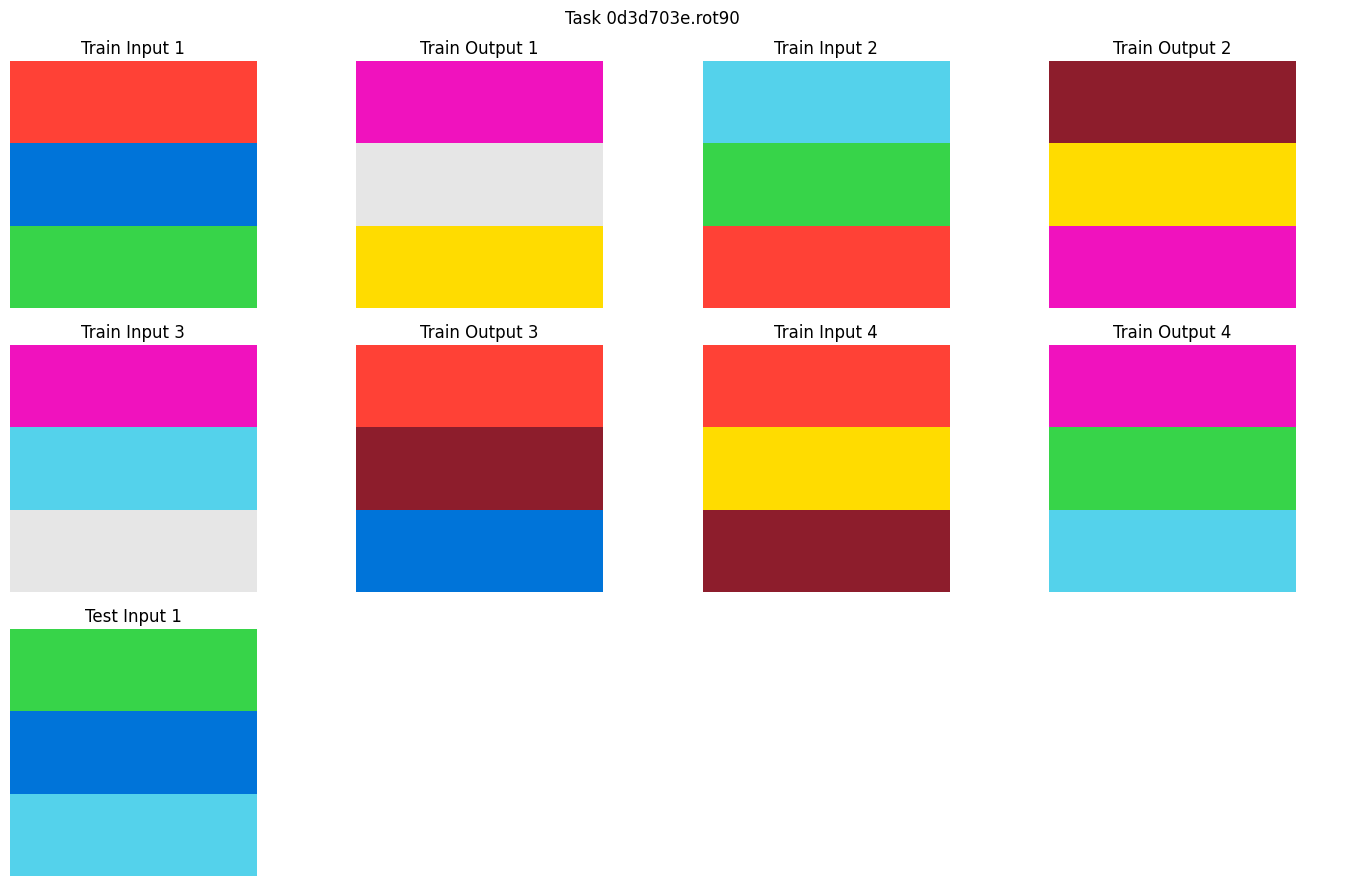

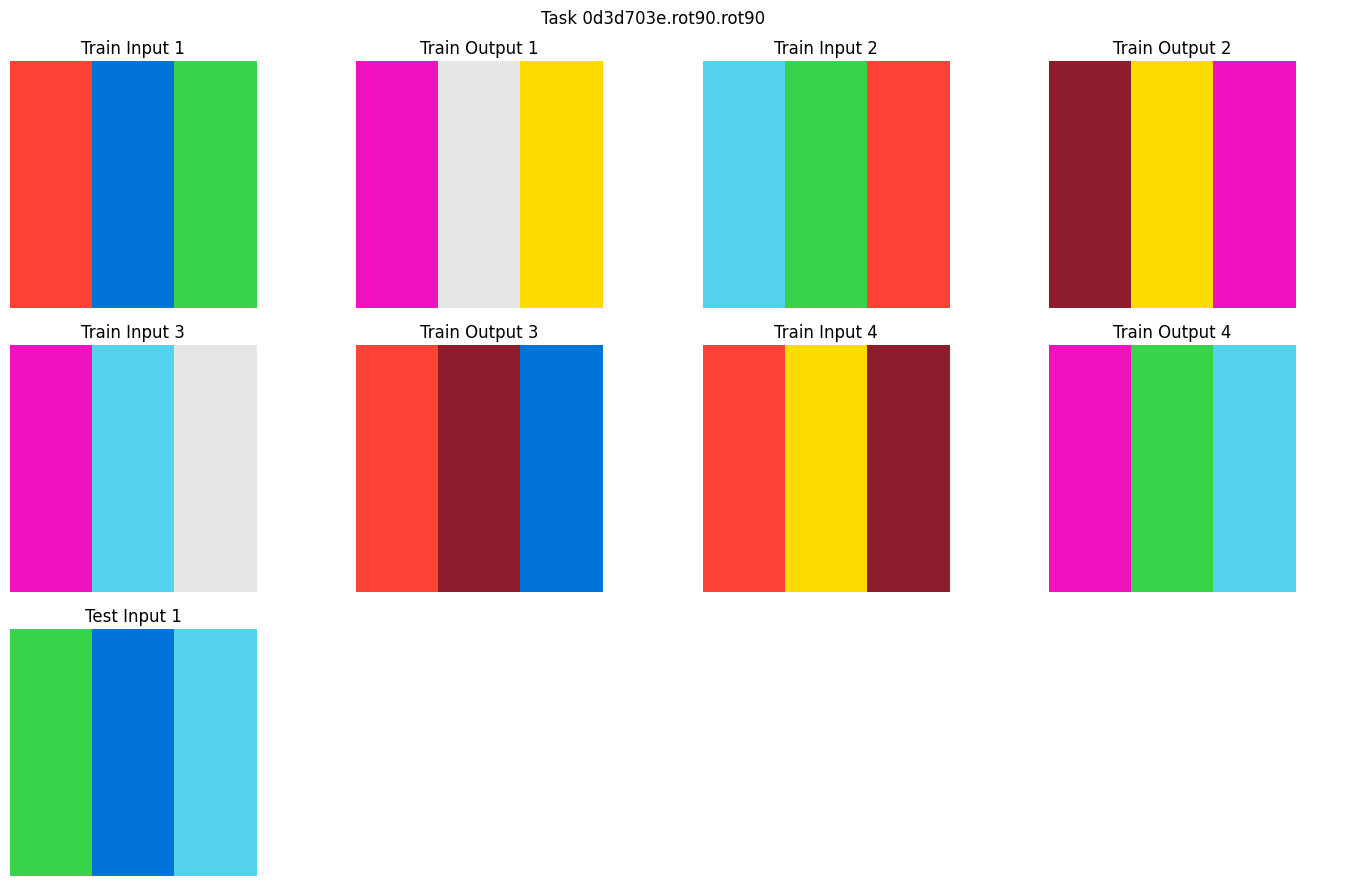

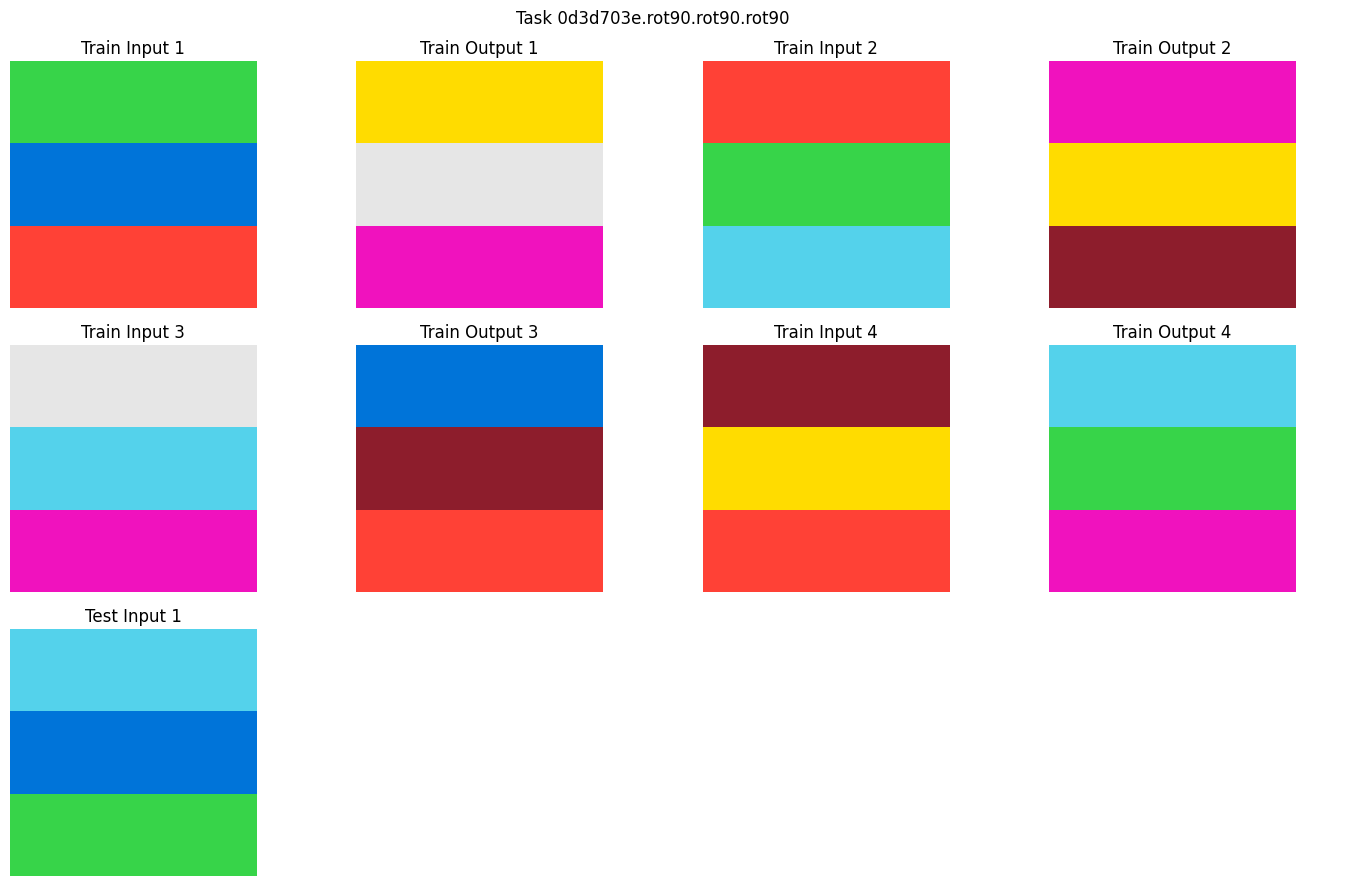

In [ ]:
from competition_code import arc_loader as al
import numpy as np
from experiments.visualize_grids import plot_task

# Load original dataset
dataset = al.ArcDataset.from_file(arc_challenge_file)
print(f"Original dataset size: {dataset.length()}")

# 1. Basic rotation augmentation
rotated = dataset.augment(
    rot=True, # could also be 'rand'
    tp=False, # could also be 'rand'
    shfl_keys=False,
    shfl_ex=False,
    n=1,  # Creates n copies of the augmentations e.g. if rot=T and n=2, then two copies of all three rotations (90, 180, 270) will be created
    seed=42
    )
print(f"Rotated dataset size: {rotated.length()}")

# Plot the original and augmented tasks
task_id = dataset.keys[15]
plot_task(dataset.queries[task_id], task_id, show_or_save="show")

for key in rotated.keys:
    if key.startswith(task_id):
        plot_task(rotated.queries[key], key, show_or_save="show")


In [81]:
import os
from competition_code import arc_loader as al

BASE_DIR = r"C:\Users\denna\Downloads\ARC-AGI\ARChitects"
arc_challenge_file = os.path.join(BASE_DIR, 'data', 'arc-agi_training_challenges.json')

# Load original dataset
dataset = al.ArcDataset.from_file(arc_challenge_file)
print(f"Original dataset size: {dataset.length()}")

# 1. Basic rotation augmentation
rotated = dataset.augment(
    rot=True, # could also be 'rand'
    tp=False, # could also be 'rand'
    shfl_keys=False,
    shfl_ex=False,
    n=1,  # Creates n copies of the augmentations e.g. if rot=T and n=2, then two copies of all three rotations (90, 180, 270) will be created
    seed=42
    )
print(f"Rotated dataset size: {rotated.length()}")

# Plot the original and augmented tasks
task_id = dataset.keys[15]

# Format examples for LLM
formatter = al.ArcFormatter_premix_3
# Formatter requires an input tokenizer before being used

print("Original Format:")
print(formatter.fmt_train(dataset.queries[task_id]['train']))
print("\nRotated Versions:")
for key in rotated.keys:
    if key.startswith(task_id):
        print(f"\nRotation: {key}")
        print(formatter.fmt_train(rotated.queries[key]['train']))


*** Load challanges from 'C:\Users\denna\Downloads\ARC-AGI\ARChitects\data\arc-agi_training_challenges.json'...
Original dataset size: 400
*** Augment dataset...
Rotated dataset size: 1600
Original Format:


AttributeError: 'NoneType' object has no attribute 'eos_token'

In [94]:
import os
import shutil

from transformers import AutoTokenizer
from huggingface_hub import snapshot_download

from competition_code import arc_loader as al


BASE_DIR = r"C:\Users\denna\Downloads\ARC-AGI\ARChitects"
arc_challenge_file = os.path.join(BASE_DIR, 'data', 'arc-agi_training_challenges.json')

# Load original dataset
dataset = al.ArcDataset.from_file(arc_challenge_file)
print(f"Original dataset size: {dataset.length()}")

# 1. Basic rotation augmentation
rotated = dataset.augment(
    rot=True, # could also be 'rand'
    tp=False, # could also be 'rand'
    shfl_keys=False,
    shfl_ex=False,
    n=1,  # Creates n copies of the augmentations e.g. if rot=T and n=2, then two copies of all three rotations (90, 180, 270) will be created
    seed=42
    )
print(f"Rotated dataset size: {rotated.length()}")

# Plot the original and augmented tasks
task_id = dataset.keys[15]

def download_model(repo_id, store_path, get_name=lambda x: x.split('/')[-1]):
    """Downloads and copies model files instead of using symlinks"""
    model_name = get_name(repo_id)
    model_path = os.path.join(store_path, model_name, 'transformers', 'default', '1')
    
    if not os.path.exists(model_path):
        try:
            # Download model
            download_path = snapshot_download(repo_id=repo_id)
            
            # Create directories
            os.makedirs(os.path.split(model_path)[0], exist_ok=True)
            
            # Copy files instead of symlink
            shutil.copytree(download_path, model_path)
        except Exception as e:
            print(f"Error downloading model: {e}")
            raise
    
    return model_path

base_model = download_model("da-fr/Llama-3.2-3B-ARChitects-ReArc-bnb-4bit", BASE_DIR)
MyFormatter = al.ArcFormatter_premix_3
tokenizer = AutoTokenizer.from_pretrained(base_model)

MyFormatter = MyFormatter(tokenizer=tokenizer)

print("Original Format:")
print(MyFormatter.fmt_train(dataset.queries[task_id]['train']).split("\n"))

print("\nRotated Versions:")
for key in rotated.keys:
    if key.startswith(task_id):
        print(f"\nRotation: {key}")
        print(MyFormatter.fmt_train(rotated.queries[key]['train']).split("\n"))



*** Load challanges from 'C:\Users\denna\Downloads\ARC-AGI\ARChitects\data\arc-agi_training_challenges.json'...
Original dataset size: 400
*** Augment dataset...
Rotated dataset size: 1600
Original Format:
['ABCDEFGHJKLMNPQRSTUVWXYZabcdefghjklmnpqrstuvwxyzI312', '312', '312', '+/-=O456', '456', '456', '<|eot_id|>I238', '238', '238', '+/-=O649', '649', '649', '<|eot_id|>I586', '586', '586', '+/-=O192', '192', '192', '<|eot_id|>I942', '942', '942', '+/-=O836', '836', '836', '<|eot_id|>']

Rotated Versions:

Rotation: 0d3d703e
['ABCDEFGHJKLMNPQRSTUVWXYZabcdefghjklmnpqrstuvwxyzI312', '312', '312', '+/-=O456', '456', '456', '<|eot_id|>I238', '238', '238', '+/-=O649', '649', '649', '<|eot_id|>I586', '586', '586', '+/-=O192', '192', '192', '<|eot_id|>I942', '942', '942', '+/-=O836', '836', '836', '<|eot_id|>']

Rotation: 0d3d703e.rot90
['ABCDEFGHJKLMNPQRSTUVWXYZabcdefghjklmnpqrstuvwxyzI222', '111', '333', '+/-=O666', '555', '444', '<|eot_id|>I888', '333', '222', '+/-=O999', '444', '666', '<|e

In [3]:
import torch
import torch.nn.functional as F

# Example logits for a single token position
logits = torch.tensor([15.6250, 20.4690, 18.4375, 15.2500, 15.4063, 16.1250, 18.8516, 21.0859, 20.6187, 22.3047, 
                       24.1094, 22.1797, 2.0266e-06, 21.9453, 21.6250, 21.8516, 17.3281, 18.4688, 18.8047, 20.1875, 
                       16.5156, 21.4922, 22.5469, 20.4987, 22.1016, 22.3516, 18.7969, 21.8672, 21.4453, 21.9844, 
                       20.6182, 21.1328, 22.5313, 18.6094, 21.0977, 22.1250, 21.8047, 23.0313, 23.2500, 17.3594, 
                       22.3281, 23.8438, 21.4609, 22.2188, 21.5625, 20.9551, 21.6250, 19.9258, 21.7656, 20.2588, 
                       20.5469, 20.5337, 16.0000, 21.9609, 21.6094, 22.2500, 21.3984, 21.4922, 20.8203, 14.3125, 
                       19.8828, 22.1641, 22.2891, 22.4297, 22.1484, 14.7813, 21.0039, 21.7969, 20.1543, 22.1563, 
                       21.6641, 21.4531, 24.1250, 19.9492, 21.3438, 25.1563, 25.0938])

# Apply softmax to get probabilities
softmax_probs = F.softmax(logits, dim=0)

# Print the softmax probabilities
print(f"Softmax probabilities: {softmax_probs}")

# Sum of softmax probabilities (should be 1.0)
sum_softmax = softmax_probs.sum()
print(f"Sum of softmax probabilities: {sum_softmax}")

Softmax probabilities: tensor([1.4947e-05, 1.8979e-03, 2.4889e-04, 1.0273e-05, 1.2011e-05, 2.4644e-05,
        3.7657e-04, 3.5172e-03, 2.2044e-03, 1.1899e-02, 7.2324e-02, 1.0501e-02,
        2.4474e-12, 8.3067e-03, 6.0301e-03, 7.5637e-03, 8.2074e-05, 2.5680e-04,
        3.5932e-04, 1.4323e-03, 3.6420e-05, 5.2802e-03, 1.5160e-02, 1.9551e-03,
        9.7120e-03, 1.2470e-02, 3.5653e-04, 7.6826e-03, 5.0383e-03, 8.6379e-03,
        2.2033e-03, 3.6861e-03, 1.4925e-02, 2.9557e-04, 3.5589e-03, 9.9419e-03,
        7.2172e-03, 2.4608e-02, 3.0623e-02, 8.4683e-05, 1.2181e-02, 5.5454e-02,
        5.1175e-03, 1.0920e-02, 5.6647e-03, 3.0860e-03, 6.0301e-03, 1.1025e-03,
        6.9404e-03, 1.5381e-03, 2.0517e-03, 2.0248e-03, 2.1748e-05, 8.4373e-03,
        5.9367e-03, 1.1266e-02, 4.8074e-03, 5.2802e-03, 2.6968e-03, 4.0230e-06,
        1.0561e-03, 1.0338e-02, 1.1715e-02, 1.3483e-02, 1.0177e-02, 6.4290e-06,
        3.2403e-03, 7.1611e-03, 1.3855e-03, 1.0258e-02, 6.2705e-03, 5.0777e-03,
        7.3461e-0